In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, rcParams
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
rcParams['figure.figsize'] = 11,10
import joblib
link = '../Datasets/hit400Dataset.csv'

In [31]:
df = pd.read_csv(link)

In [32]:
df.head()

,amount,account_age,holder_age,account_balance,transaction_time,entry_type,gender,broswer,avs,cvv,connection_type,card_number,account_type,location,bank,label
0,7025,4030,53,1230,5,magnetic strip,female,Mozilla/5.0,n,6348,https,465,debit,Bulawayo,First Capital Bank,True
1,4438,5587,47,1663,10,online,male,Chrome/41.0.2272.89,y,2744,http,681,debit,Harare,Agribank,False
2,5271,7440,24,1602,10,online,female,lk/41.0.2272.89,n,5105,https,262,debit,Bulawayo,Steward Bank,False
3,7878,5776,51,2808,1,chip,female,Mozilla/5.0,y,2369,http,552,debit,Harare,BANC ABC,False
4,1339,6597,52,4526,10,chip,female,Chrome/41.0.2272.89,y,6225,https,297,debit,Rusape,Agribank,False


In [33]:
df.info()
#checking feature data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   amount            35000 non-null  int64 
 1   account_age       35000 non-null  int64 
 2   holder_age        35000 non-null  int64 
 3   account_balance   35000 non-null  int64 
 4   transaction_time  35000 non-null  int64 
 5   entry_type        35000 non-null  object
 6   gender            35000 non-null  object
 7   broswer           35000 non-null  object
 8   avs               35000 non-null  object
 9   cvv               35000 non-null  int64 
 10  connection_type   35000 non-null  object
 11  card_number       35000 non-null  int64 
 12  account_type      35000 non-null  object
 13  location          35000 non-null  object
 14  bank              35000 non-null  object
 15  label             35000 non-null  bool  
dtypes: bool(1), int64(7), object(8)
memory usage: 4.0+ MB


In [34]:
df.isnull().sum()
#checking for missing values

amount              0
account_age         0
holder_age          0
account_balance     0
transaction_time    0
entry_type          0
gender              0
broswer             0
avs                 0
cvv                 0
connection_type     0
card_number         0
account_type        0
location            0
bank                0
label               0
dtype: int64

In [35]:
 df['bank'].value_counts()
#checking the distrubuting of catagories in the bank attributes

Agribank              13580
FBC Bank               4620
Steward Bank           4480
BANC ABC               4375
CBZ Bank               4060
First Capital Bank     3885
Name: bank, dtype: int64

In [36]:
 df['account_type'].value_counts()
    #checking the distrubution of catagories in the card type attributes

debit     18305
credit    16695
Name: account_type, dtype: int64

In [37]:
 df['location'].value_counts()
    #checking the distrubution of catagories in the location attributes

Bulawayo     9590
Harare       8225
Kwekwe       4585
Gweru        3815
Hwange       2450
Rusape       2240
Bindura      2170
Marondera    1925
Name: location, dtype: int64

c:\users\nyasha chizampeni\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


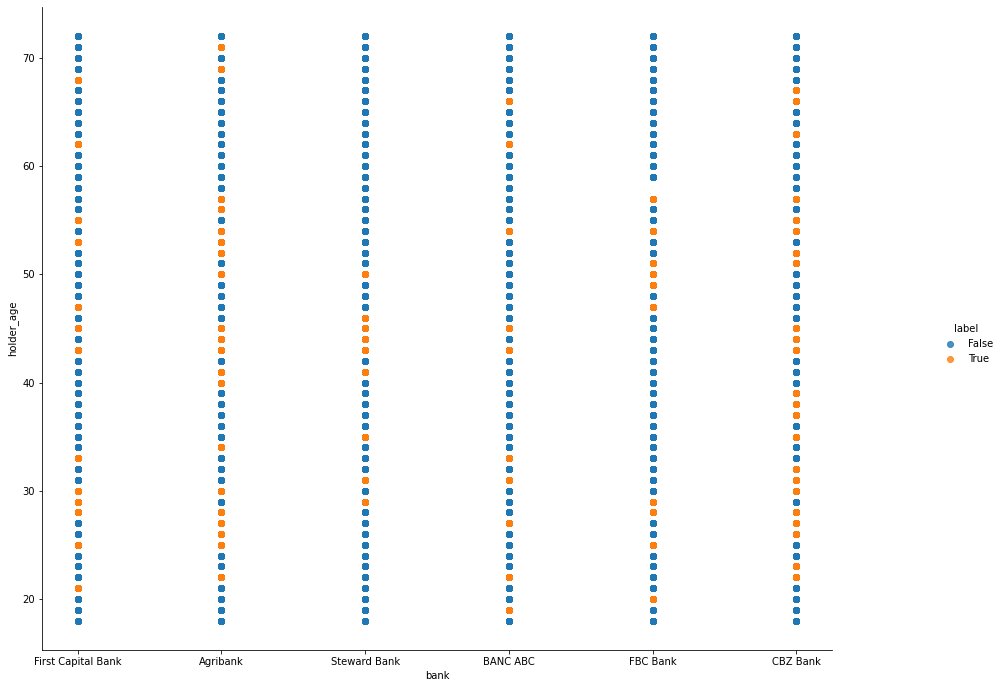

In [38]:
#data visualisation
sns.lmplot('bank', 'holder_age', df, hue='label', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

In [39]:
df['label'].value_counts()
#checking the distrubution of catagories in the data label

False    34265
True       735
Name: label, dtype: int64

In [40]:
matrix = df.corr()

In [41]:
#checking the correlation of features with respect to the label
matrix['label'].sort_values(ascending=False)

label               1.000000
cvv                 0.035908
transaction_time    0.018024
amount              0.004563
card_number        -0.002643
account_age        -0.004141
account_balance    -0.005390
holder_age         -0.013732
Name: label, dtype: float64

<AxesSubplot:>

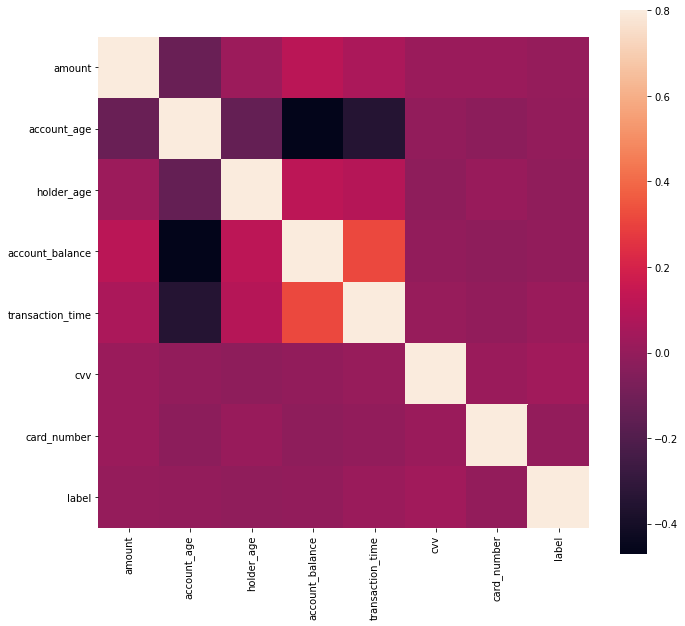

In [42]:
#plotting a correlation heat map
sns.heatmap(matrix, vmax=0.8, square=True)

In [45]:
#defing a data transformation pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import StandardScaler
num_pipe = Pipeline([
('imputer', Imputer(strategy="median")),
('std_scaler', StandardScaler()),
])

pipe = ColumnTransformer([
("num", num_pipe, ['holder_age','account_age','cvv', 'account_balance','transaction_time', 'card_number']),
("cat", OneHotEncoder(), ['account_type','location','bank','connection_type','broswer','avs', 'gender','label','entry_type'])
])

#exporting the data transformation pipeline
#joblib.dump(pipe,'pipeline.pkl')


In [46]:
#separating the data label from the other features

target = "label"
X = df.drop(target, axis=1)  #training set
y = df[target]   #labels
print(X)
#transforming the data
pipe= pipe.fit(X)
#joblib.dump(pipe,'pipeline.pkl')
X = pipe.transform(X)

       amount  account_age  holder_age  account_balance  transaction_time  \
0        7025         4030          53             1230                 5   
1        4438         5587          47             1663                10   
2        5271         7440          24             1602                10   
3        7878         5776          51             2808                 1   
4        1339         6597          52             4526                10   
...       ...          ...         ...              ...               ...   
34995    3951          122          33             3114                 4   
34996    6518          202          46             1552                22   
34997    9903          291          66             9148                19   
34998   12187          218          21            14699                 5   
34999    4731          140          51             5935                14   

           entry_type  gender              broswer avs   cvv connection_typ

In [50]:
X.shape
v = X.copy()
#v['label'] = target

X

array([[ 0.81086204,  0.18277118,  0.30468768, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.34714132,  0.61736169, -1.08549001, ...,  0.        ,
         0.        ,  1.        ],
       [-1.43045473,  1.13457185, -0.17477704, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.81559024, -0.8608601 , -0.37188603, ...,  0.        ,
         1.        ,  0.        ],
       [-1.66231509, -0.8812359 , -1.33544427, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.65628846, -0.90300729,  1.27711775, ...,  0.        ,
         0.        ,  1.        ]])

In [17]:
y.shape

(37510,)

In [18]:
#defing the outlier fraction for the local Outlier Factor algorithm
fraud = df[df['Label'] == 1]
normal = df[df['Label'] == 0]
outlier_fraction =  len(fraud) / float(len(normal))
outlier_fraction

0.2338815789473684

In [19]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.tree import DecisionTreeClassifier

In [20]:
classifier_accuracy = {}


In [21]:
#initializing the classification algorithms
classifiers = {
               'Local Outlier Factor': LocalOutlierFactor(n_neighbors=20, contamination=outlier_fraction, algorithm='auto', leaf_size=25, metric='minkowski'),
               'Support Vector Machine': OneClassSVM(kernel='rbf', degree=3, gamma= 0.1, nu=0.05, max_iter=-1),
               'Decision Tree Classifier':DecisionTreeClassifier( criterion='entropy',splitter="best", max_leaf_nodes=15),
               'Isolation Forest': IsolationForest(max_samples=len(X), contamination=outlier_fraction, random_state=1, verbose=0),
               'Ada Boost Classifier':AdaBoostClassifier(),
               'Random Forest Classifier':RandomForestClassifier(), 
               'KNeighbors Classifier': KNeighborsClassifier(5)
               
              }

In [22]:
#fitting, training and evaluating each algorithm 
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
   
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        y_pred[y_pred ==1]=0
        y_pred[y_pred ==-1]=1
        n_errors = (y_pred !=y).sum()
        print('{}:{}'.format(clf_name,n_errors))
        print('Accuracy Score:',accuracy_score(y, y_pred))
        print(classification_report(y, y_pred))
        classifier_accuracy.update({clf_name:accuracy_score(y, y_pred)})
    
    
    elif clf_name == 'Support Vector Machine':
        clf.fit(X)
        y_pred = clf.predict(X)
        y_pred[y_pred ==1]=0
        y_pred[y_pred ==-1]=1
        n_errors = (y_pred !=y).sum()
        print('{}:{}'.format(clf_name,n_errors))
        print('Accuracy Score:',accuracy_score(y, y_pred))
        print(classification_report(y, y_pred))
        classifier_accuracy.update({clf_name:accuracy_score(y, y_pred)})
    
    
    
    elif clf_name == 'Decision Tree Classifier':
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        n_errors = (y_pred !=y_test).sum()
        print('{}:{}'.format(clf_name,n_errors))
        print('Accuracy Score:',accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        classifier_accuracy.update({clf_name:accuracy_score(y_test, y_pred)})
        #exporting the prefered model
        joblib.dump(clf,'fraud_detection_model.pkl')
        x = clf
    
    elif clf_name == 'Ada Boost Classifier':
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        n_errors = (y_pred !=y_test).sum()
        print('{}:{}'.format(clf_name,n_errors))
        print('Accuracy Score:',accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        classifier_accuracy.update({clf_name:accuracy_score(y_test, y_pred)})

        
    elif clf_name == 'Random Forest Classifier':
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
        clf = DecisionTreeClassifier()
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        n_errors = (y_pred !=y_test).sum()
        print('{}:{}'.format(clf_name,n_errors))
        print('Accuracy Score:',accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        classifier_accuracy.update({clf_name:accuracy_score(y_test, y_pred)})

    elif clf_name == 'KNeighbors Classifier':
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        n_errors = (y_pred !=y_test).sum()
        print('{}:{}'.format(clf_name,n_errors))
        print('Accuracy Score:',accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        classifier_accuracy.update({clf_name:accuracy_score(y_test, y_pred)})
        
    else:
        clf.fit(X)
        score_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        y_pred[y_pred ==1]=0
        y_pred[y_pred ==-1]=1
        n_errors = (y_pred !=y).sum()
        print('{}:{}'.format(clf_name,n_errors))
        print('Accuracy Score:',accuracy_score(y, y_pred))
        print(classification_report(y, y_pred))
        classifier_accuracy.update({clf_name:accuracy_score(y, y_pred)})
    print('-------------------------------------------------------------')

Local Outlier Factor:12489
Accuracy Score: 0.6670487869901359
              precision    recall  f1-score   support

       False       0.81      0.77      0.79     30400
        True       0.19      0.24      0.21      7110

    accuracy                           0.67     37510
   macro avg       0.50      0.50      0.50     37510
weighted avg       0.69      0.67      0.68     37510

-------------------------------------------------------------
Support Vector Machine:8409
Accuracy Score: 0.7758197813916289
              precision    recall  f1-score   support

       False       0.81      0.95      0.87     30400
        True       0.15      0.04      0.06      7110

    accuracy                           0.78     37510
   macro avg       0.48      0.49      0.47     37510
weighted avg       0.68      0.78      0.72     37510

-------------------------------------------------------------
Decision Tree Classifier:1897
Accuracy Score: 0.8314227317159868
              precision    recal

In [47]:
#creating a table of classifiers and thier accuracy
ca = [[a,b] for a,b in classifier_accuracy.items()]
ca = pd.DataFrame(ca, columns=['Classifier','Accuracy'])
ca


,Classifier,Accuracy
0,Local Outlier Factor,0.667049
1,Support Vector Machine,0.775820
2,Decision Tree Classifier,0.831423
3,Isolation Forest,0.672914
4,Ada Boost Classifier,0.840398
5,Random Forest Classifier,0.974051
6,KNeighbors Classifier,0.807518


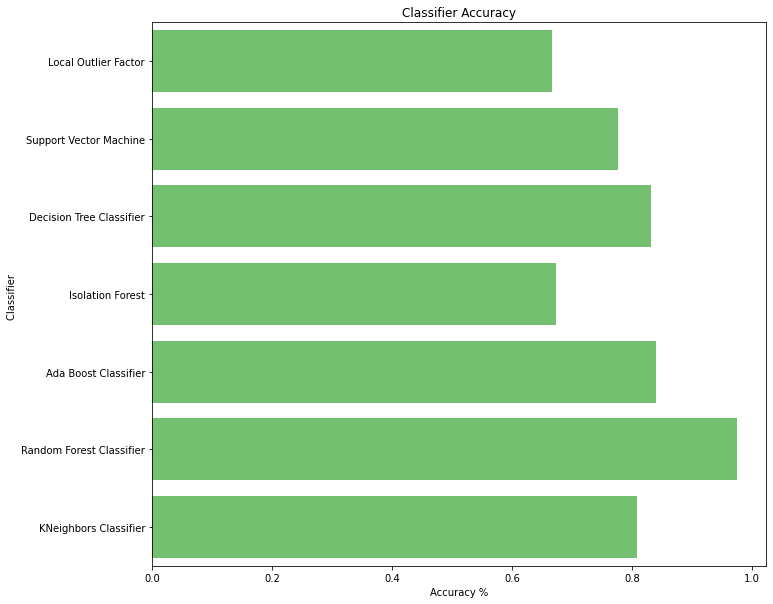

In [49]:
#plotting classifiers and thier accuracy
import seaborn as sns
sns.set_color_codes('muted')
sns.barplot(x='Accuracy', y='Classifier', data=ca, color='g')
plt.xlabel('Accuracy %')
plt.ylabel('Classifier ')
plt.title('Classifier Accuracy')
plt.show()